In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community as nxcom#This part of networkx, for community detection, needs to be imported separately.
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)
    
    
    
with open('quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [26]:
print(len(node_names))
print(len(edges))

119
174


In [65]:
G = nx.Graph()
#G=nx.star_graph(20)
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [66]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')    

#print(G.nodes())
#print(G.edges())

In [67]:
# access birth date attribute
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

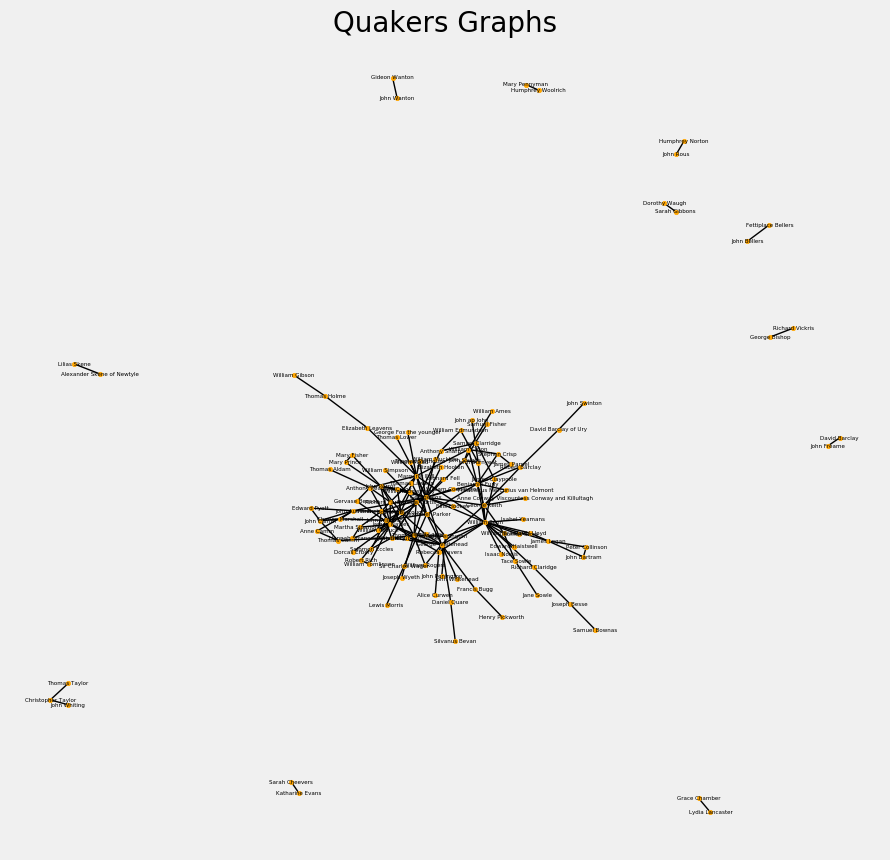

In [100]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

pos = nx.spring_layout(G)

# drawing nodes
nx.draw_networkx_nodes(G, pos, node_size = 10, node_color = 'orange')

# drawing edges
nx.draw_networkx_edges(G, pos, width = 1, alpha = 1.0, edge_color = 'black')

# labels
nx.draw_networkx_labels(G, pos, font_size = 4, font_family = 'sans-serif')

plt.title('Quakers Graphs', fontsize = 20)
plt.axis('off')
plt.show()

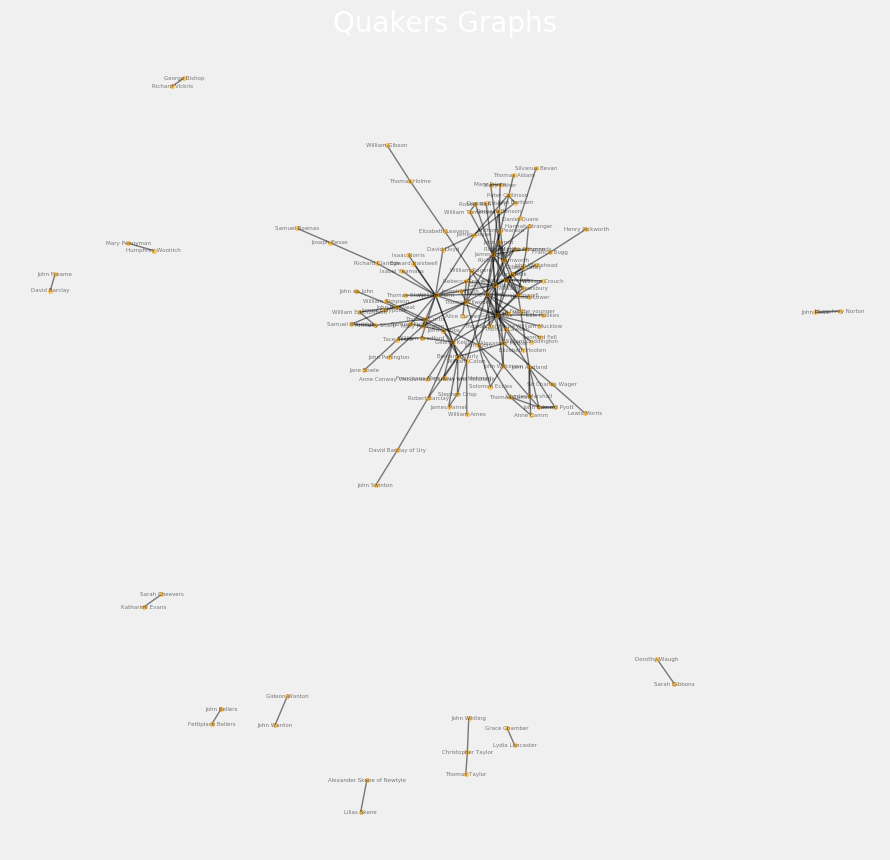

In [142]:
## another visualization
pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (10, 10)})
plt.style.use('fivethirtyeight')
nx.draw_networkx(
        G, 
        pos=pos, 
        node_size=10, 
        node_color ="orange",
        edge_color="black",#"#444444", 
        alpha=0.5, 
        width = 1,
        font_size = 4, 
        font_family = 'sans-serif',
        with_labels=True)
plt.title('Quakers Graphs', fontsize = 20)
plt.axis('off')
plt.show()

In [69]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In [70]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")
fell_whitehead_path_length = nx.shortest_path_length(G, source="Margaret Fell", target="George Whitehead")
print("Shortest path between Fell and Whitehead:", fell_whitehead_path)
print("Length of that path:", len(fell_whitehead_path)-1)
print("Length of that path:", fell_whitehead_path_length)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']
Length of that path: 2
Length of that path: 2


In [71]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [72]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)


Triadic closure: 0.16937799043062202


In [73]:
degree_dict = dict(G.degree(G.nodes()))
#print(degree_dict)
nx.set_node_attributes(G, degree_dict, 'degree')
print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [74]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [193]:
eigenvector_dict = nx.eigenvector_centrality(G) #find the hub, considering how many other hubs you are connected to
#eigenvector_dict = nx.eigenvector_centrality_numpy(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:20]:
    print(b)

Top 20 nodes by eigenvector centrality:
('George Fox', 0.4491750710859924)
('James Nayler', 0.3352974100447867)
('William Penn', 0.2703220115399868)
('Margaret Fell', 0.253170949905681)
('George Whitehead', 0.2497455334914196)
('Edward Burrough', 0.23147427604862297)
('Francis Howgill', 0.1909539378268105)
('Benjamin Furly', 0.1878520634691651)
('John Perrot', 0.1849692807795611)
('George Keith', 0.18384690867915351)
('Thomas Ellwood', 0.17608142535843857)
('Richard Farnworth', 0.15368535029296415)
('John Crook', 0.1327158126880779)
('Rebecca Travers', 0.1184804064465093)
('Alexander Parker', 0.11587808682088324)
('Anthony Pearson', 0.11120476725256784)
('William Dewsbury', 0.11057869321157121)
('John Stubbs', 0.10693500692141825)
('John Audland', 0.0983088971933375)
('Thomas Salthouse', 0.09548628544138771)


In [75]:
betweenness_dict = nx.betweenness_centrality(G) # shortest paths that pass through a particular node
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)


Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [50]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)


Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

In [187]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

c_list = list(communities)
print('total communities', len(c_list))
print('first community=', sorted(c_list[0]), '\n 2nd community = ', sorted(c_list[1]))
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

#print(G.nodes['William Penn'])

total communities 18
first community= ['Anne Conway Viscountess Conway and Killultagh', 'David Lloyd', 'Edward Haistwell', 'George Keith', 'Isaac Norris', 'Isabel Yeamans', 'James Logan', 'Jane Sowle', 'John Bartram', 'Joseph Besse', 'Peter Collinson', 'Richard Claridge', 'Samuel Bownas', 'Tace Sowle', 'Thomas Story', 'William Bradford', 'William Penn'] 
 2nd community =  ['Anthony Pearson', 'Dorcas Erbery', 'Elizabeth Leavens', 'Francis Howgill', 'George Fox the younger', 'Gervase Benson', 'Hannah Stranger', 'James Nayler', 'Margaret Fell', 'Martha Simmonds', 'Richard Farnworth', 'Robert Rich', 'Thomas Aldam', 'Thomas Holme', 'Thomas Lower', 'William Gibson', 'William Tomlinson']


In [105]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['modularity'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['modularity'] == G.nodes[w]['modularity']:
            # Internal edge, mark with community
            G.edges[v, w]['modularity'] = G.nodes[v]['modularity']
        else:
            # External edge, mark as 0
            G.edges[v, w]['modularity'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            



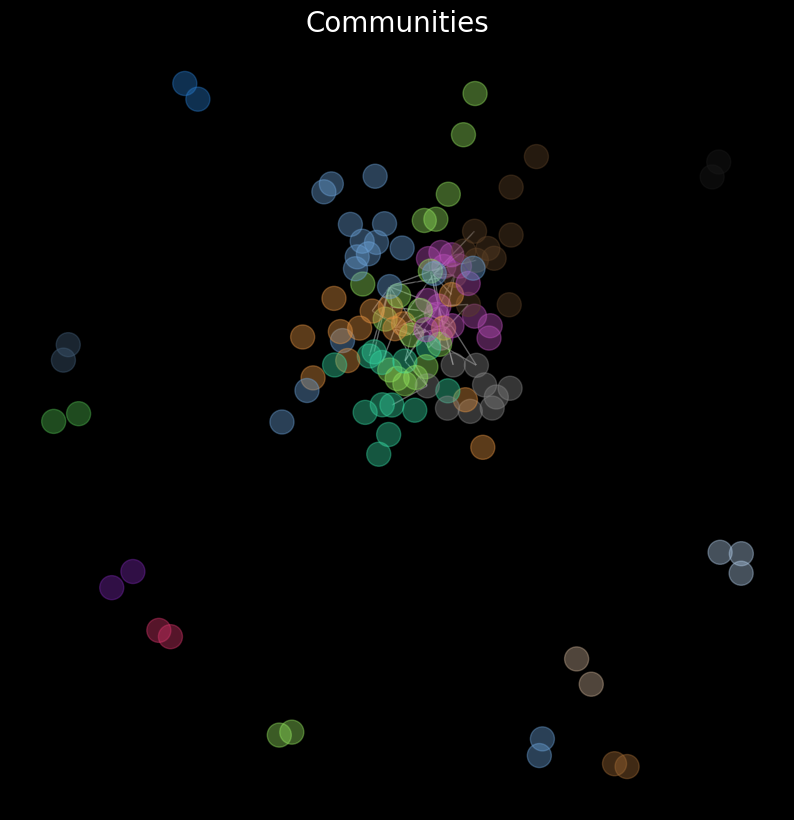

In [184]:
#plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 10)
#plt.style.use('fivethirtyeight')

# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['modularity'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['modularity'] > 0]


internal_color = ["black" for e in internal]
#internal_color = [get_color(e) for e in internal]
node_color = [get_color(G.nodes[v]['modularity']) for v in G.nodes]


pos = nx.spring_layout(G, k=0.1)

# drawing external nodes
#nx.draw_networkx_nodes(G, pos, node_size = 0, node_color = 'node_color')
#nx.draw_networkx_edges(G, pos, width = 1, alpha = 1.0, edge_color = 'silver',edgelist=external)
# drawing external nodes
#nx.draw_networkx_nodes(G, pos, node_size = 30, node_color = node_color)
#nx.draw_networkx_edges(G, pos, width = 1, alpha = 1.0, edge_color = internal_color, edgelist=internal)
#nx.draw_networkx_labels(G, pos, font_size = 4, font_family = 'sans-serif', font_color = 'black')

nx.draw_networkx(
    G, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    width = 1,
    node_color=node_color,
    alpha=0.5, #0.2 
    with_labels=False)
# internal edges
nx.draw_networkx(
    G, 
    pos=pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.4, #0.05 
    with_labels=False)

plt.title('Communities', fontsize = 20)
plt.axis('off')
plt.show()

In [198]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", round(node[1],3))

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: William Penn | Eigenvector Centrality: 0.27
Name: George Keith | Eigenvector Centrality: 0.184
Name: William Bradford | Eigenvector Centrality: 0.068
Name: Tace Sowle | Eigenvector Centrality: 0.047
Name: James Logan | Eigenvector Centrality: 0.044


## Cliques

A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. Cliques are in a way tight communities where every nodes is connected to every other. A maximal clique is a clique that cannot be extended by including one more adjacent vertex. 

['Richard Farnworth', 'James Nayler', 'Margaret Fell', 'Anthony Pearson']


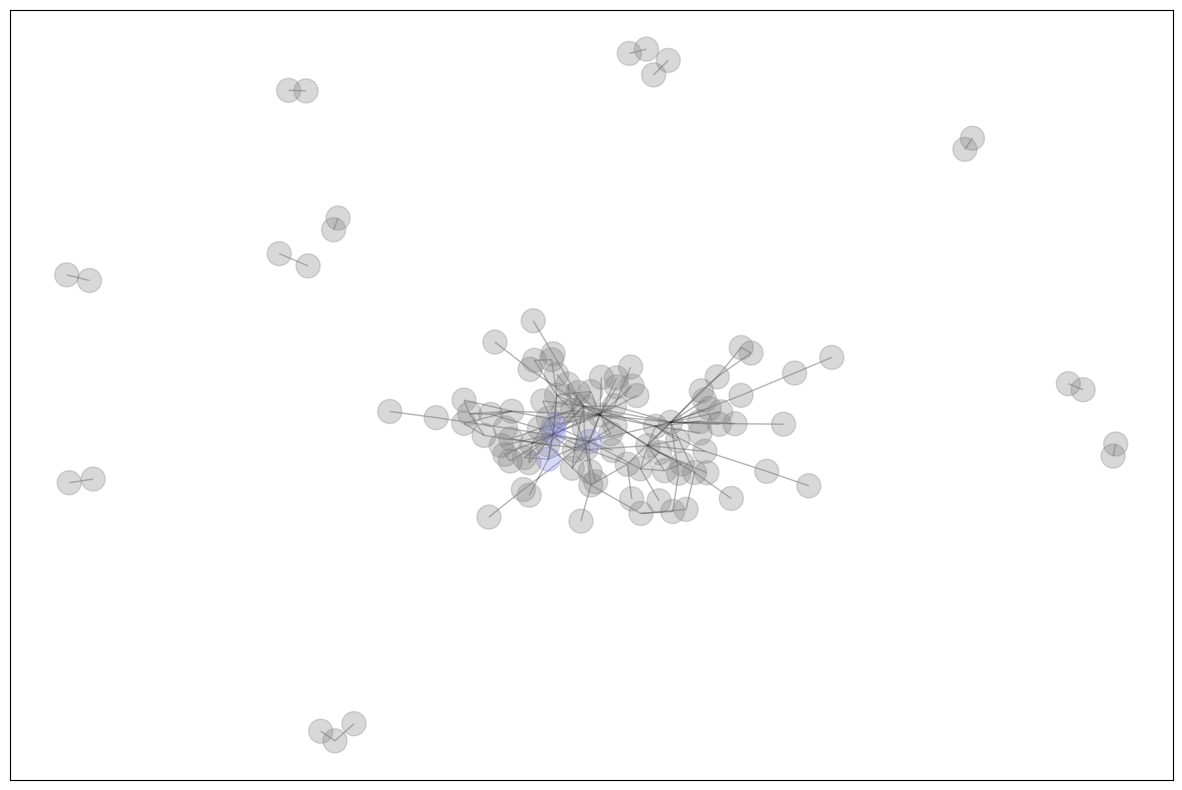

In [179]:
pos = nx.spring_layout(G)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
cliques = list(nx.find_cliques(G))
max_clique = max(cliques, key=len)
print(max_clique)
node_color = [(0.5, 0.5, 0.5) for v in G.nodes()]
for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
        
nx.draw_networkx(G, 
                 node_color=node_color, 
                 pos=pos,
                 alpha=0.3,
                 with_labels=False)